<a href="https://colab.research.google.com/github/ekkalaks/CS652_Applied-Machine-Learning/blob/main/CS652_Applied-Machine-Learning/Assignment/assignment4/6409035646_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6409035646 เอกลักษณ์ สุขุมาลพงศ์กุล
github: https://github.com/ekkalaks/CS652_Applied-Machine-Learning/blob/main/Assignment/assignment4/6409035646_assignment4.ipynb

## Part 1: ทำงานกับชุดข้อมูลที่มี categorical features

### Reading the data

In [4]:
# import library
import pandas as pd

adult_train = pd.read_csv("/content/adult_train.csv")
adult_test = pd.read_csv("/content/adult_test.csv")


In [5]:
adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,177119,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,216481,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,256263,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,147640,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


In [6]:
adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
y_train = adult_train[['target']]
X_train = adult_train.drop("target", axis = 1)

In [8]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,27,Private,177119,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States
1,27,Private,216481,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
2,25,Private,256263,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
3,46,Private,147640,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States
4,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,43,Local-gov,33331,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
32557,44,Private,98466,10th,6,Never-married,Farming-fishing,Unmarried,White,Male,0,0,35,United-States
32558,23,Private,45317,Some-college,10,Separated,Sales,Own-child,White,Female,0,0,40,United-States
32559,45,Local-gov,215862,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,United-States


In [9]:
y_train

,target
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,>50K
...,...
32556,>50K
32557,<=50K
32558,<=50K
32559,>50K


In [10]:
y_test = adult_test[['target']]
X_test = adult_test.drop("target", axis = 1)

In [11]:
X_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [12]:
y_test

,target
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
16276,<=50K
16277,<=50K
16278,<=50K
16279,<=50K


## Encoding the features as numbers

In [13]:
from sklearn.feature_extraction import DictVectorizer

In [14]:
dicts_X_train = X_train.to_dict('records')
dicts_X_train

[{'age': 27,
  'capital-gain': 0,
  'capital-loss': 0,
  'education': 'Some-college',
  'education-num': 10,
  'fnlwgt': 177119,
  'hours-per-week': 44,
  'marital-status': 'Divorced',
  'native-country': 'United-States',
  'occupation': 'Adm-clerical',
  'race': 'White',
  'relationship': 'Unmarried',
  'sex': 'Female',
  'workclass': 'Private'},
 {'age': 27,
  'capital-gain': 0,
  'capital-loss': 0,
  'education': 'Bachelors',
  'education-num': 13,
  'fnlwgt': 216481,
  'hours-per-week': 40,
  'marital-status': 'Never-married',
  'native-country': 'United-States',
  'occupation': 'Prof-specialty',
  'race': 'White',
  'relationship': 'Not-in-family',
  'sex': 'Female',
  'workclass': 'Private'},
 {'age': 25,
  'capital-gain': 0,
  'capital-loss': 0,
  'education': 'Assoc-acdm',
  'education-num': 12,
  'fnlwgt': 256263,
  'hours-per-week': 40,
  'marital-status': 'Married-civ-spouse',
  'native-country': 'United-States',
  'occupation': 'Sales',
  'race': 'White',
  'relationship': 

In [15]:
dicts_X_test = X_test.to_dict('records')
dicts_X_test

[{'age': 25,
  'capital-gain': 0,
  'capital-loss': 0,
  'education': '11th',
  'education-num': 7,
  'fnlwgt': 226802,
  'hours-per-week': 40,
  'marital-status': 'Never-married',
  'native-country': 'United-States',
  'occupation': 'Machine-op-inspct',
  'race': 'Black',
  'relationship': 'Own-child',
  'sex': 'Male',
  'workclass': 'Private'},
 {'age': 38,
  'capital-gain': 0,
  'capital-loss': 0,
  'education': 'HS-grad',
  'education-num': 9,
  'fnlwgt': 89814,
  'hours-per-week': 50,
  'marital-status': 'Married-civ-spouse',
  'native-country': 'United-States',
  'occupation': 'Farming-fishing',
  'race': 'White',
  'relationship': 'Husband',
  'sex': 'Male',
  'workclass': 'Private'},
 {'age': 28,
  'capital-gain': 0,
  'capital-loss': 0,
  'education': 'Assoc-acdm',
  'education-num': 12,
  'fnlwgt': 336951,
  'hours-per-week': 40,
  'marital-status': 'Married-civ-spouse',
  'native-country': 'United-States',
  'occupation': 'Protective-serv',
  'race': 'White',
  'relationship

In [16]:
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(dicts_X_train)

In [17]:
X_train_encoded

<32561x108 sparse matrix of type '<class 'numpy.float64'>'
	with 455854 stored elements in Compressed Sparse Row format>

In [18]:
X_test_encoded = dv.transform(dicts_X_test)

In [19]:
X_test_encoded

<16281x108 sparse matrix of type '<class 'numpy.float64'>'
	with 227934 stored elements in Compressed Sparse Row format>

## Part 2: Decision trees and random forests

### Part 2.1: Decission trees

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
train_scores = []
test_scores = []
for dp in [1,2,3,4,5,6,7,8,9,10,11,12]:
    tree = DecisionTreeClassifier(max_depth = dp, random_state = 42)
    tree.fit(X_train_encoded , y_train)
    train_scores.append(tree.score(X_train_encoded, y_train ))
    test_scores.append(tree.score(X_test_encoded, y_test ))

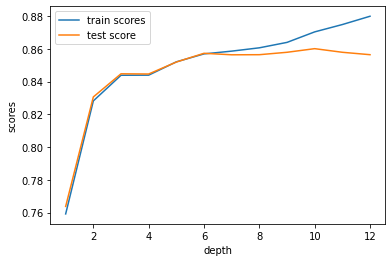

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(1,13,1), train_scores)
plt.plot(range(1,13,1), test_scores)
plt.legend(['train scores', 'test score'])
plt.xlabel('depth')
plt.ylabel('scores')
plt.show()

### Part 2.2: Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [26]:
train_scores = []
test_scores = []
for num in range(1,101,1):
    tree = RandomForestClassifier(n_estimators = num, n_jobs=-1, random_state = 42)
    tree.fit(X_train_encoded , y_train)
    train_scores.append(tree.score(X_train_encoded, y_train ))
    test_scores.append(tree.score(X_test_encoded, y_test ))

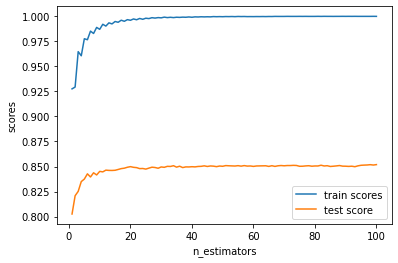

In [27]:
plt.plot(range(1,101,1), train_scores)
plt.plot(range(1,101,1), test_scores)
plt.legend(['train scores', 'test score'])
plt.xlabel('n_estimators')
plt.ylabel('scores')
plt.show()

In [28]:
model = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state = 42)
model.fit(X_train_encoded , y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

                             Attribute  Importance
20                              fnlwgt    0.162712
0                                  age    0.150249
1                         capital-gain    0.097851
21                      hours-per-week    0.083689
24   marital-status=Married-civ-spouse    0.064052
3                        education-num    0.059628
91                relationship=Husband    0.041904
2                         capital-loss    0.031640
26        marital-status=Never-married    0.022478
75          occupation=Exec-managerial    0.020655
81           occupation=Prof-specialty    0.015689
13                 education=Bachelors    0.011367
92          relationship=Not-in-family    0.010780
103                  workclass=Private    0.010455
97                          sex=Female    0.009883
98                            sex=Male    0.009807
96                   relationship=Wife    0.008970
94              relationship=Own-child    0.008886
105         workclass=Self-emp-

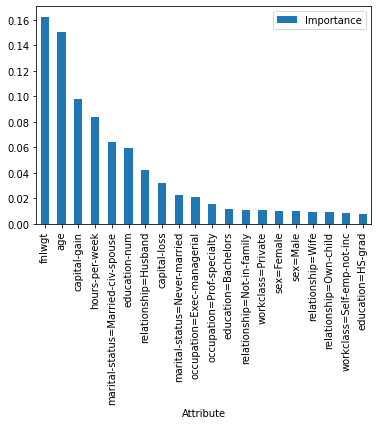

In [29]:
importances = pd.DataFrame(data={
    'Attribute': dv.feature_names_,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.nlargest(20, 'Importance')
print (importances.nlargest(20, 'Importance'))
importances.plot(x ='Attribute', y='Importance', kind = 'bar')

## ให้สรุปผลที่ได้จาก 1 และ 2 เป็น เซลล์ text ใน โปรแกรม ด้วยการตอบคำถามต่อไปนี้

###  การใช้ decision tree และ random forest ที่มีจำนวนต้นไม้เพียง 1 ต้น ให้ผลที่ต่างกันหรือไม่ถ้าต่างกัน ท่านคิดว่าเหตุใดจึงเป็นเช่นนั้น


> ตอบ การใช้ decision tree และ random forest ที่มีจำนวนต้นไม้เพียง 1 ต้น ให้ผลที่ต่างกัน เพราะต้นไม้แต่ละต้นใน random forest ถูกออกแบบให้ทำนายได้เก่งกับข้อมูลในแต่ละส่วนที่ไม่เหมือนกัน จากนั้นนำผลลัพธ์ของต้นไม้แต่ละต้นมาหาค่าเฉลี่ย แต่ใน decision tree จะพยายามทำให้ต้นไม้ 1 ต้นทำนายได้เก่งกับทั้งชุดข้อมูล



###  ค่าของ test set accuracy เป็นอย่างไรเมื่อจำนวนต้นไม้ใน random forests เพิ่มขึ้น


> ตอบ ค่าของ test set accuracy นั้นเพิ่มมากขึ้น เมื่อจำนวนต้นไม้ใน random forests เพิ่มขึ้น แต่พอถึงจุดนึงการเพิ่มจำนวนของต้นไม้ใน random forests 
จะไม่ค่อยส่งผลต่อ ค่า test set accuracy ให้เพิ่มขึ้นอย่างชัดเจน โดยที่ ค่า test set accuracy ก็จะเริ่มคงที่



###  เวลาที่ใช้ในการฝึกสอนเป็นอย่างไรเมื่อจำนวนต้นไม้ใน random forests เพิ่มขึ้น


> ตอบ เมื่อจำนวนต้นไม้ใน random forests เพิ่มขึ้น ก็จะใช้เวลาในการฝึกสอนมากขึ้นตาม ซึ่งถ้ารันด้วย colab นั้นใช้เวลา ถึง 21m 12s completed at 8:57 PM

